# Visualization PCA Raw Images
It has been shown that raw images + pca + svm gives a good accuracy. Thus, the goal of this notebook is to visualize the first components on raw images. 




In [53]:
import sys
sys.path.append('../src')
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import linalg as LA
import pickle
from PIL import Image
import os
from pathlib import Path
import yaml

In [34]:
current_dir = Path.cwd()
#proj_path = current_dir.parent
proj_path = current_dir.parent
# make the code in src available to import in this notebook
sys.path.append(os.path.join(proj_path, 'src'))

# Catalog contains all the paths related to datasets
with open(os.path.join(proj_path, 'conf/data_catalog.yml'), "r") as f:
    catalog = yaml.safe_load(f)

# Params contains all of the dataset creation parameters and model parameters
with open(os.path.join(proj_path, 'conf/parameters.yml'), "r") as f:
    params = yaml.safe_load(f)

In [122]:
with open(os.path.join(catalog['data_root'],catalog['02_interim_pd']), 'rb') as handle:
    df = pickle.load(handle)

In [123]:
df= df.sample(frac=1, random_state= 42)

In [125]:
def reshape_raw_images(df, M, N):
    # Reshape the data appropriately
    data = df['img'].iloc[0].view(1, M * N)
    for i in tqdm(range(1, df['img'].shape[0])):
        data = torch.cat([data, df['img'].iloc[i].view(1, M * N)])
    data = pd.DataFrame(data.numpy())
    return data

In [126]:
data = reshape_raw_images(df, 434, 636)

100%|██████████| 549/549 [00:06<00:00, 81.28it/s] 


In [124]:
df[0:100]['class'].value_counts()

1    61
0    39
Name: class, dtype: int64

## Visualize Sample

class: 1


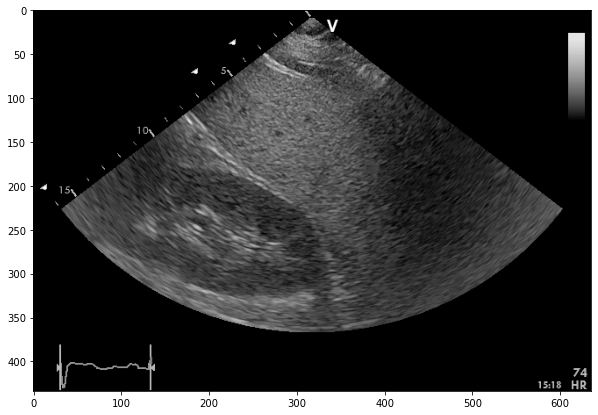

In [259]:
import numpy as np
import matplotlib.pyplot as plt
img = df.iloc[98]['img'].view(434,636).numpy()
#img = imread(‘s1/1.pgm’)
img = img.astype(np.uint8)
img = img / 255
plt.figure (figsize=(10,10))
plt.imshow(img,cmap='gray')
print(f"class: {df.iloc[98]['class']}")

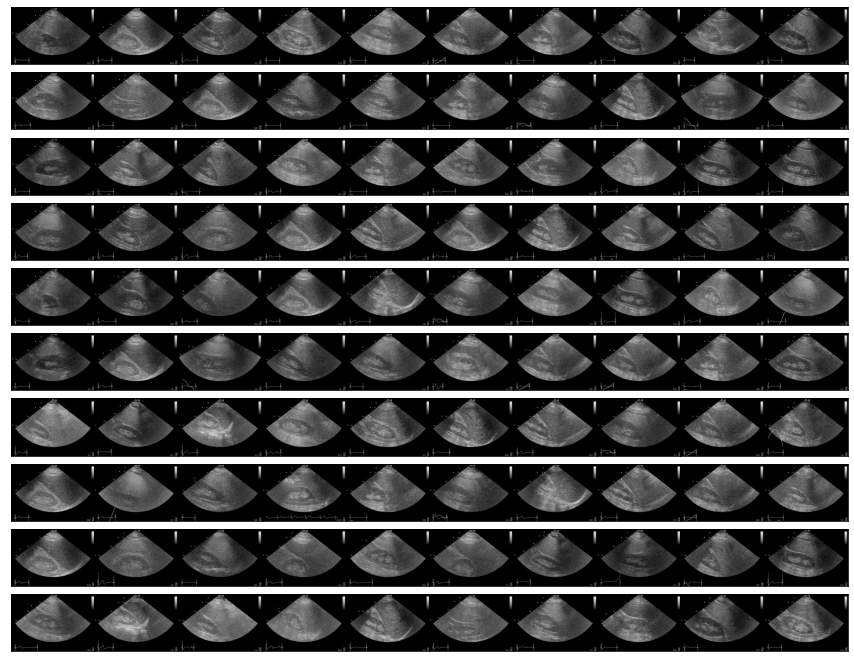

In [212]:
from glob import iglob
faces = pd.DataFrame([])  
fig, axes = plt.subplots(10,10,figsize=(15,12), subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.00, wspace=0.00))


for i, ax in enumerate(axes.flat):
    ax.imshow(data.iloc[i].values.reshape(434,636),cmap='gray')

In [234]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
data_pca= PCA(n_components=5)
data_pca.fit(data)

PCA(n_components=5)

In [235]:
def create_cumul_var_graph(pca):
    ratio = pca.explained_variance_ratio_
    cumulative = np.cumsum(ratio)
    n_components = np.arange(0, len(cumulative))
    plt.plot(n_components, cumulative)
    plt.title("Cumulative Explained Variance by number of components")
    plt.ylabel("Cumulative Ratio")
    plt.xlabel("Number of components")

[0.23560806 0.3060175  0.34721613 0.37858367 0.4073817 ]


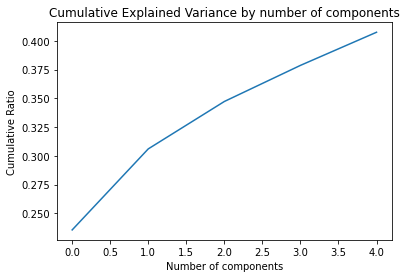

In [236]:
create_cumul_var_graph(data_pca)
plt.savefig("PCAcumul-base.png")
print(data_pca.explained_variance_ratio_.cumsum())

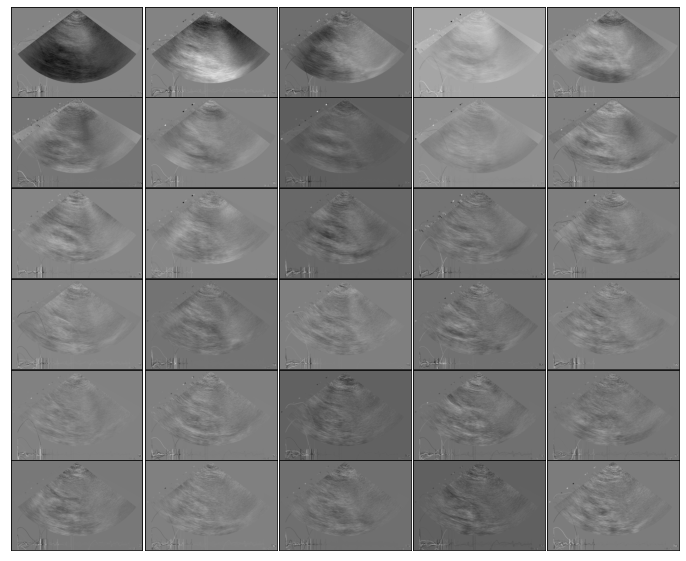

In [219]:
fig, axes = plt.subplots(6,5,figsize=(12,10),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(data_pca.components_[i].reshape(434,636),cmap='gray')

In [237]:
components = data_pca.transform(data)

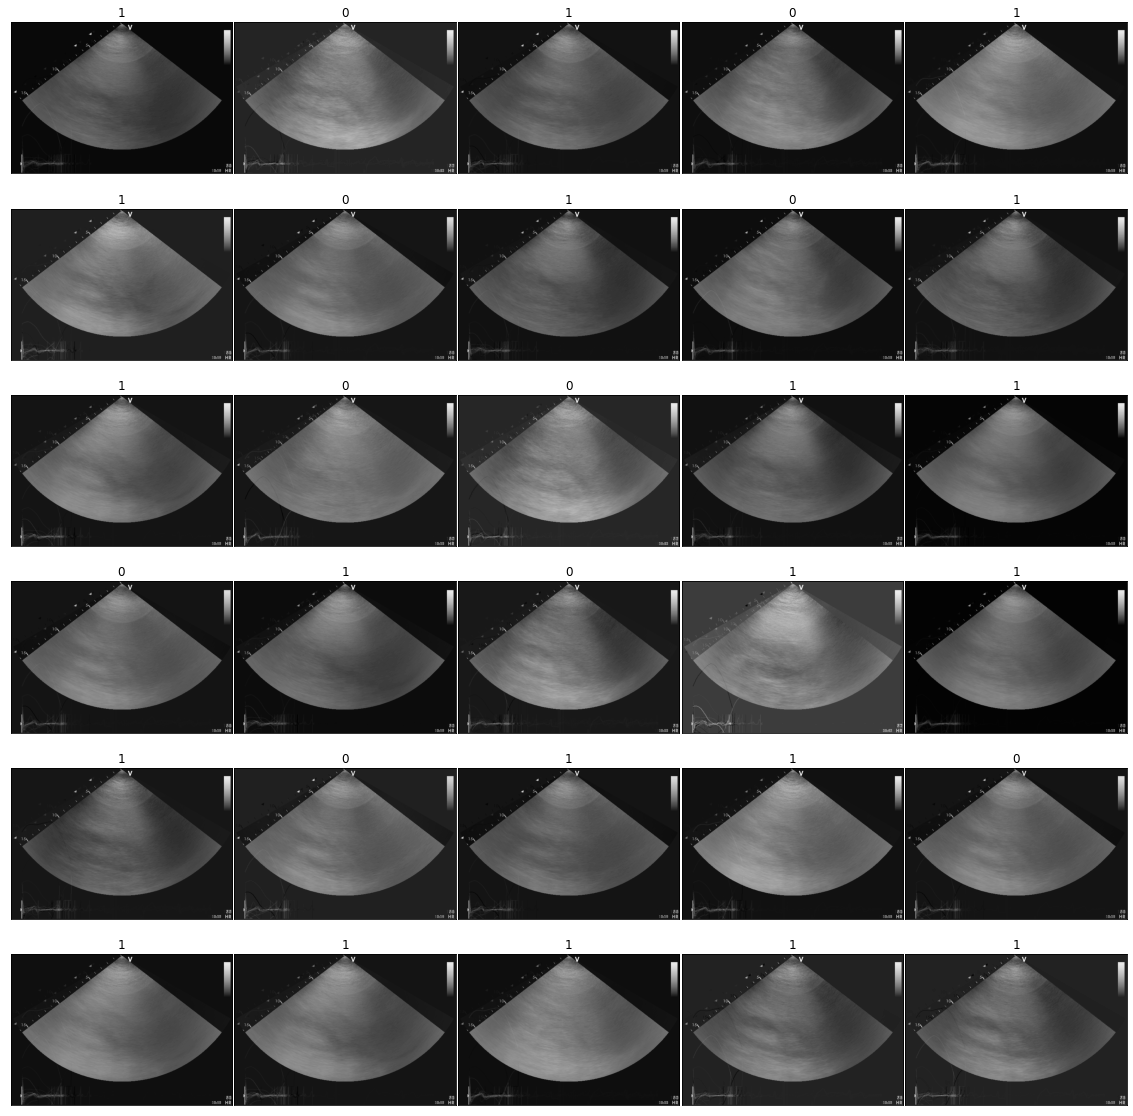

In [255]:
projected = data_pca.inverse_transform(components)
fig, axes = plt.subplots(6,5,figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.2, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(434,636),cmap="gray")
    ax.title.set_text(df.iloc[i]['class'])

In [239]:
df[0:100]['class']

195    1
79     0
480    1
109    0
522    1
      ..
11     0
275    1
22     0
369    1
101    0
Name: class, Length: 100, dtype: uint8